In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from prettytable import PrettyTable
import matplotlib.pyplot  as plt
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, RFE

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
def grid_search_cv(estimator, grid_params, scoring, n_jobs, cv, is_refit, is_return_train_score):
    return GridSearchCV(
      estimator = estimator,
      param_grid = grid_params,
      scoring = scoring,
      n_jobs = n_jobs,
      cv = cv,
      refit = is_refit,
      return_train_score = is_return_train_score
    )
def train_mlp(X_train, y_train):
  clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64, 32, 16), random_state=1)
  clf.fit(X_train, y_train)
  return clf
def train_random_forest(X_train, y_train, n):
  clf = RandomForestRegressor(n_estimators=n)
  clf.fit(X_train, y_train)
  return clf

def train_linear_regression(X_train, y_train):
  clf = LinearRegression()
  return clf.fit(X_train, y_train)

def train_svm(X_train, y_train):
  clf = SVR()
  clf.fit(X_train, y_train)
  return clf

def train_knn(X_train, y_train, n):
  clf = KNeighborsRegressor(n_neighbors=5)
  clf.fit(X_train, y_train)
  return clf

def standard_scaler(X):
  scaler = StandardScaler()
  return scaler.fit_transform(X)

def min_max_scaler(X):
  scaler = MinMaxScaler()
  return scaler.fit_transform(X)

def pca_feature(X, n_component):
  pca = PCA(n_components=n_component)
  return pca.fit_transform(X)

def k_best_feature(X, y, k):
  k_best  = SelectKBest(chi2, k=k)
  return k_best.fit_transform(X, y)

def rfe_feature(X, estimator, k):
  rfe = RFE(estimator, n_features_to_select=k)
  return rfe.fit_transform(X, y)

def extra_tree_feature(X, y, n):
  extra_tree = ExtraTreesRegressor(n_estimators=n)
  return extra_tree.fit(X, y)

def split_data(X, y):
  X_train, y_train = X[:-100], y[:-100]
  X_test, y_test = X[-100:len(X)-1], y[-100:len(y)-1]
  return X_train, X_test, y_train, y_test

def get_X_newest(X, y):
  return X[len(X)-1: len(X)], y[len(y)-1: len(y)]

def predict(X_test, estimator):
  return estimator.predict(X_test)

def plot_graph(values, title, xlabel, ylabel):
  plt.figure()
  values.plot(figsize = (15, 5))

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()


def evaluation1(y_true, y_pred):
  return mean_squared_error(y_true, y_pred), mean_absolute_error(y_true, y_pred), r2_score(y_true, y_pred), mean_absolute_percentage_error(y_true, y_pred)
def evaluation2(y_true, y_pred):
  return round(mean_squared_error(y_true, y_pred), 3), round(mean_absolute_error(y_true, y_pred), 3), round(r2_score(y_true, y_pred), 3), round(mean_absolute_percentage_error(y_true, y_pred), 3)

In [ ]:
apple = yf.Ticker("AAPL")
apple = apple.history(period='max')

In [ ]:
x_close = apple['Close']

In [ ]:
apple['Tomorrow'] = apple['Close'].shift(-1)

In [ ]:
apple = apple.drop(['Dividends', 'Stock Splits'], axis=1)

In [ ]:
ma10 = pd.DataFrame()
ma20 = pd.DataFrame()
ma50 = pd.DataFrame()
ma100 = pd.DataFrame()
ma200 = pd.DataFrame()

ma10['MA10'] = pd.DataFrame(x_close.rolling(10).mean())
ma20['MA20'] = pd.DataFrame(x_close.rolling(20).mean())
ma50['MA50'] = pd.DataFrame(x_close.rolling(50).mean())
ma100['MA100'] = pd.DataFrame(x_close.rolling(100).mean())
ma200['MA200'] = pd.DataFrame(x_close.rolling(200).mean())

In [ ]:
apple['MA10'] = ma10
apple['MA20'] = ma20
apple['MA50'] = ma50
apple['MA100'] = ma100
apple['MA200'] = ma200
apple['Date'] = pd.to_datetime(apple.index).astype(int) / 10**9

In [ ]:
X_newest, y_newest = get_X_newest(apple.drop(['Tomorrow', 'Close'], axis=1),  apple['Tomorrow'])

In [ ]:
X_min = np.array(apple.drop(['Tomorrow', 'Close'], axis=1).min())
X_max = np.array(apple.drop(['Tomorrow', 'Close'], axis=1).max())
y_min = apple['Tomorrow'].min()
y_max = apple['Tomorrow'].max()

In [ ]:
apple = apple.loc["1990-01-01":"2024-06-01"].copy()

In [ ]:
X, y = apple.drop(['Tomorrow', 'Close'], axis=1), apple['Tomorrow']

In [ ]:
X_mm, y_mm = min_max_scaler(X), min_max_scaler(y.values.reshape(-1, 1))

In [ ]:
# chuẩn hóa min max cho dữ liệu cuối cùng
X_newest_mm = []

for i in range(X_newest.shape[1]):
  scaled = (np.array(X_newest)[0][i] - X_min[i]) / (X_max[i] - X_min[i])
  X_newest_mm.append(scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mm, y_mm, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(6069, 10)
(2601, 10)
(6069, 1)
(2601, 1)


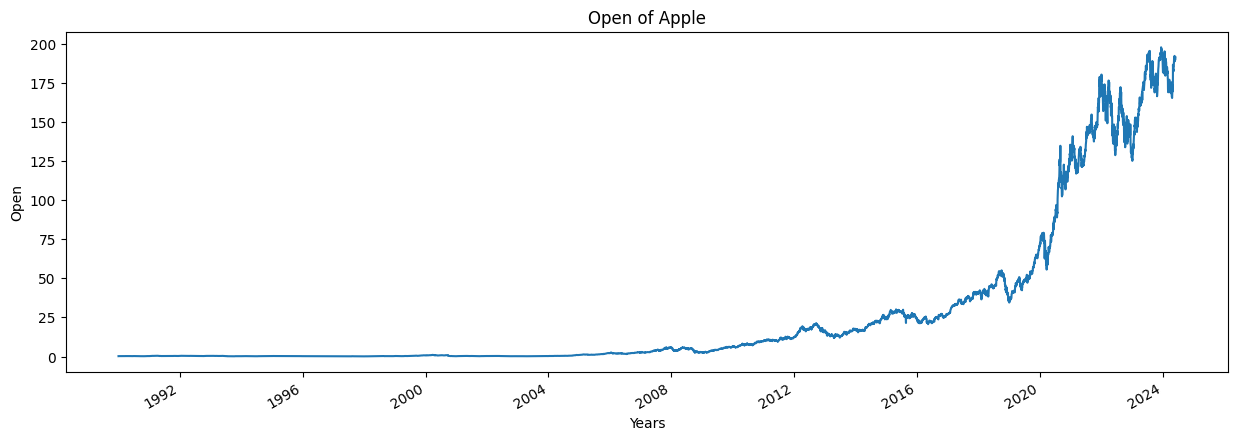

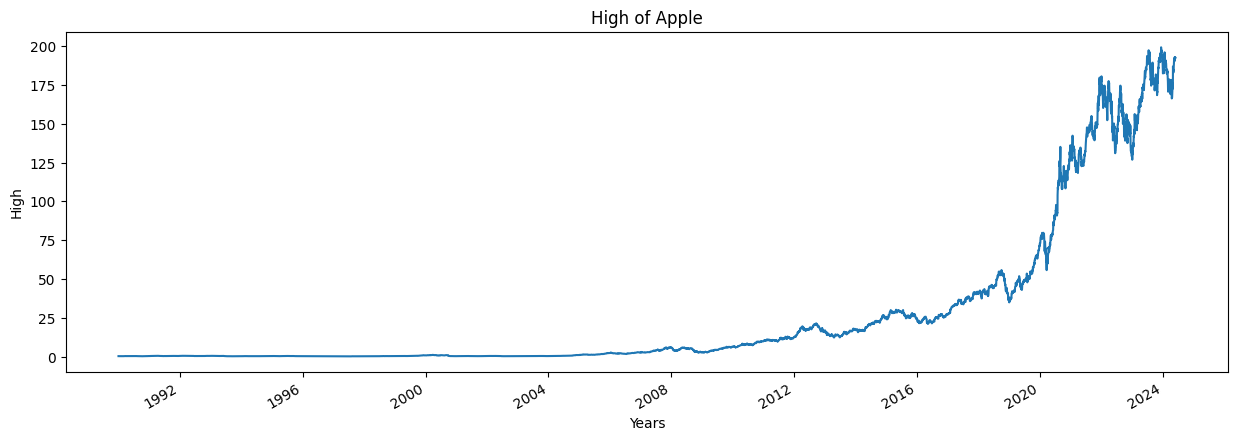

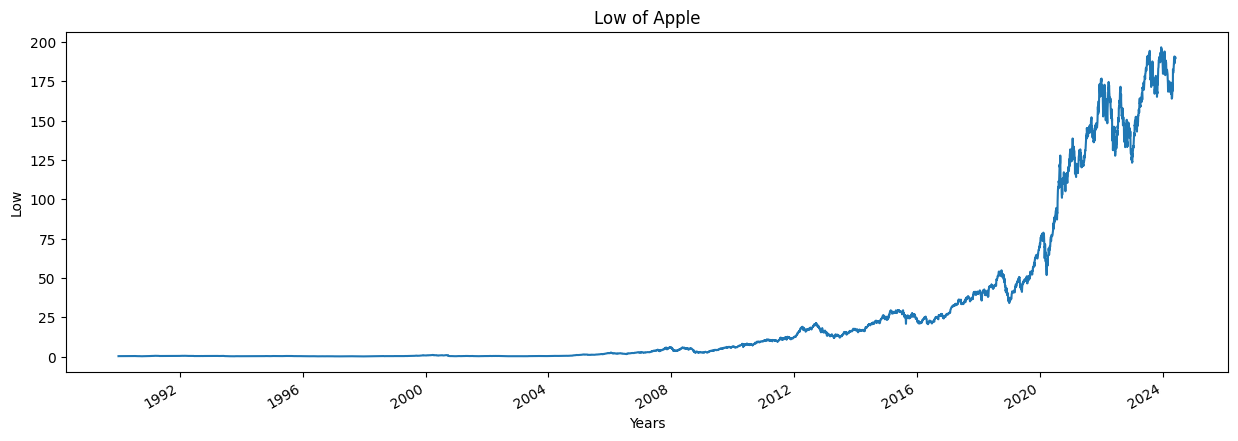

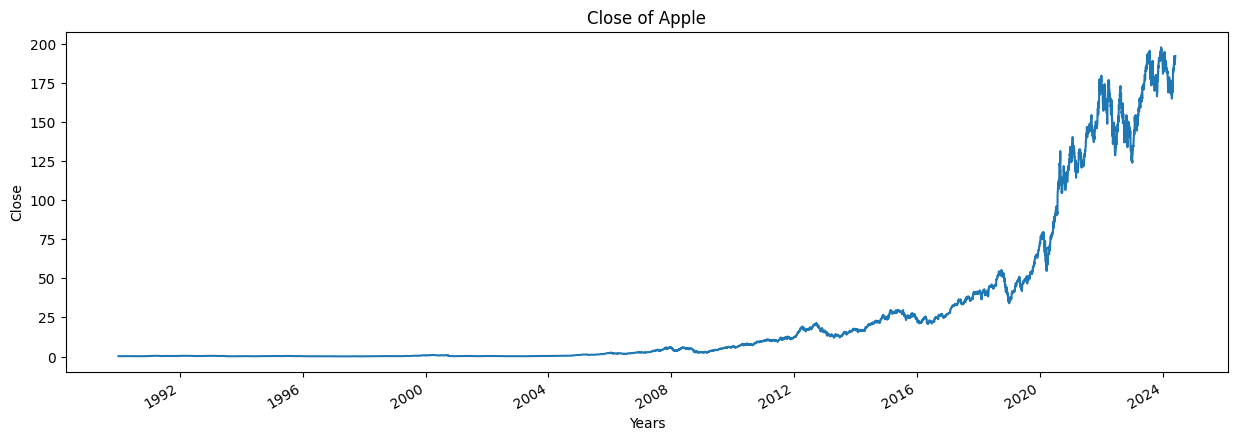

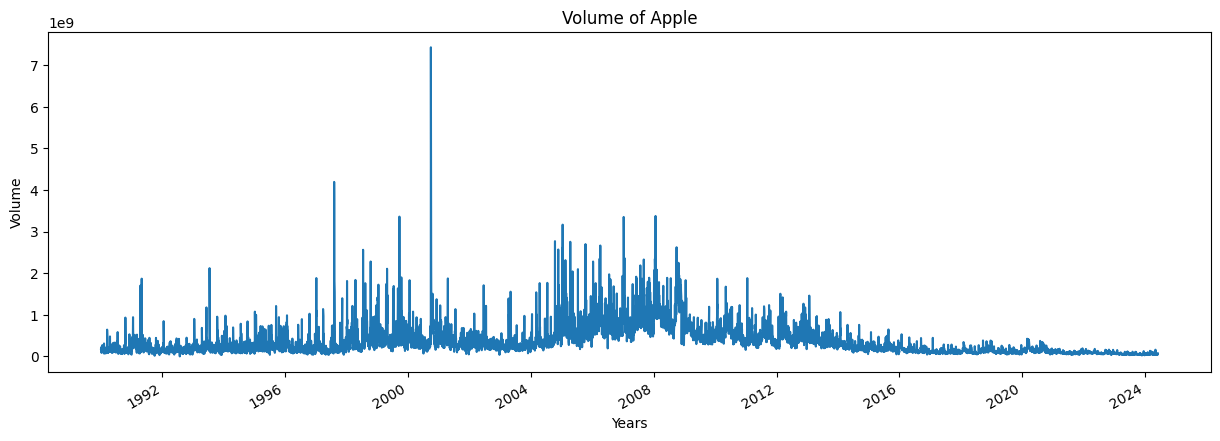

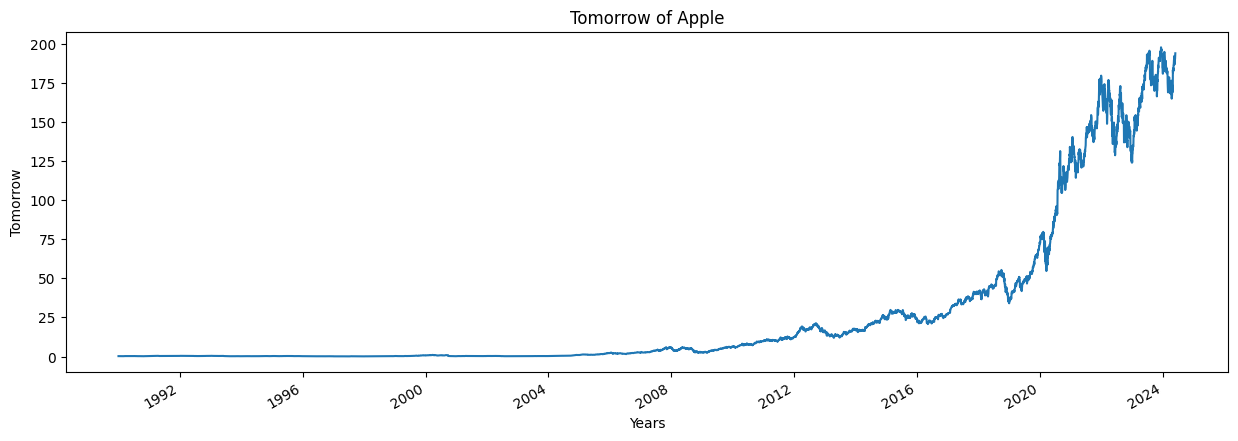

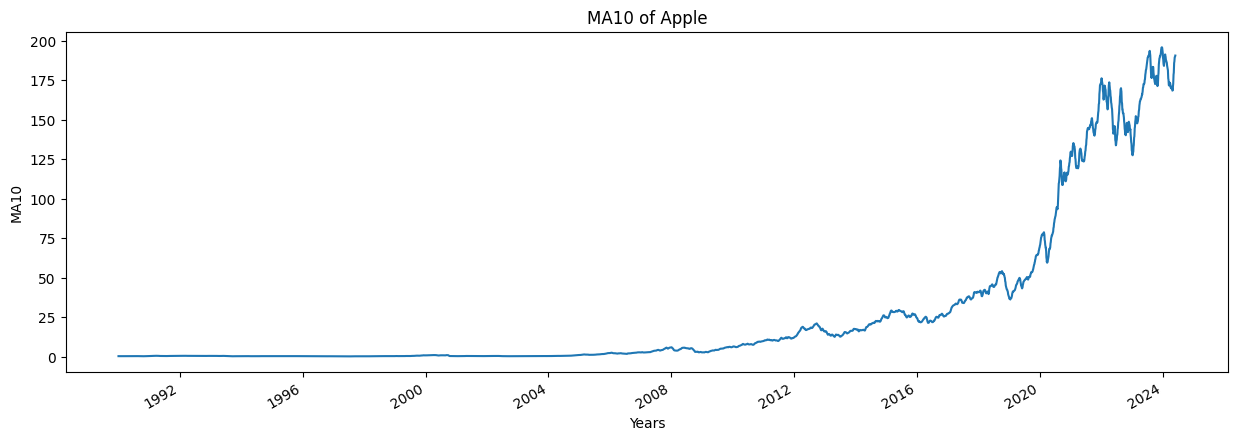

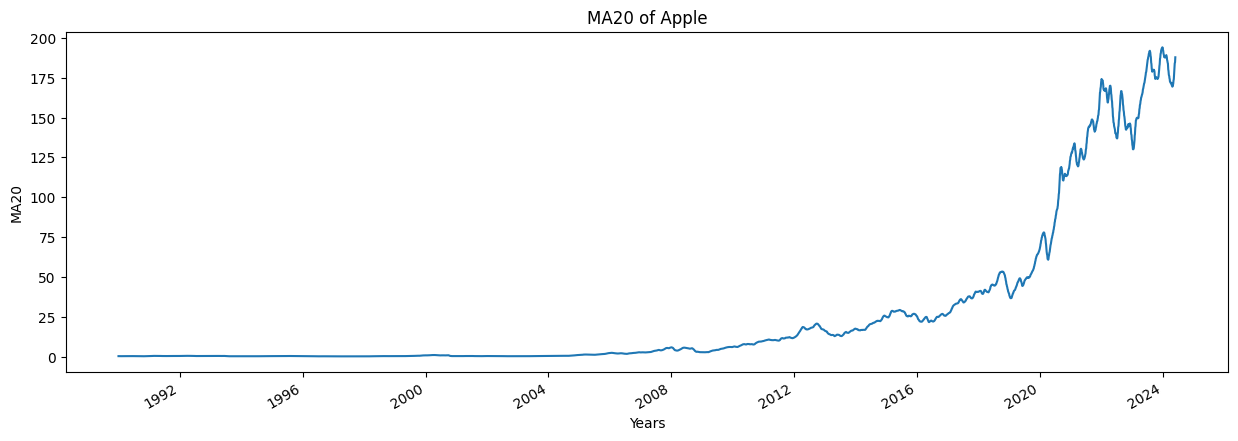

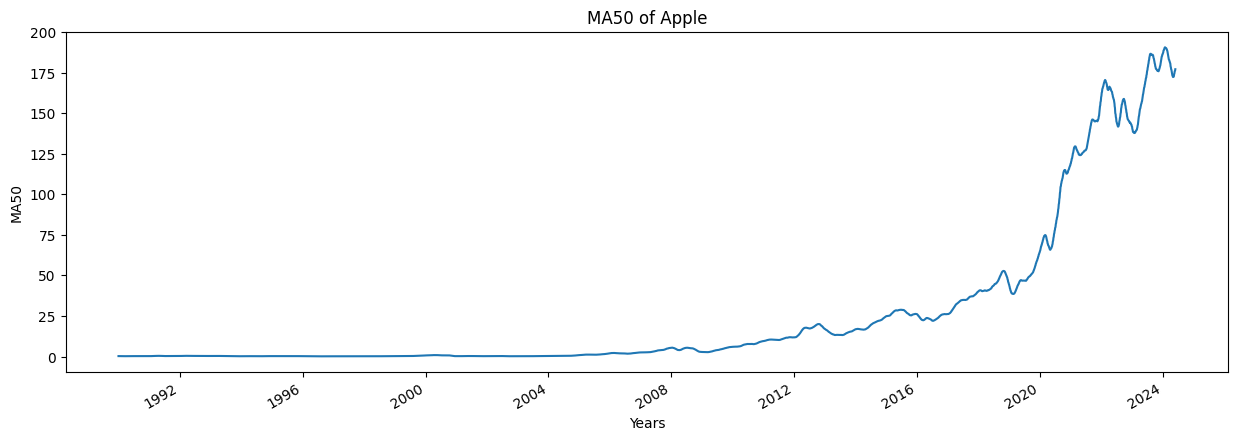

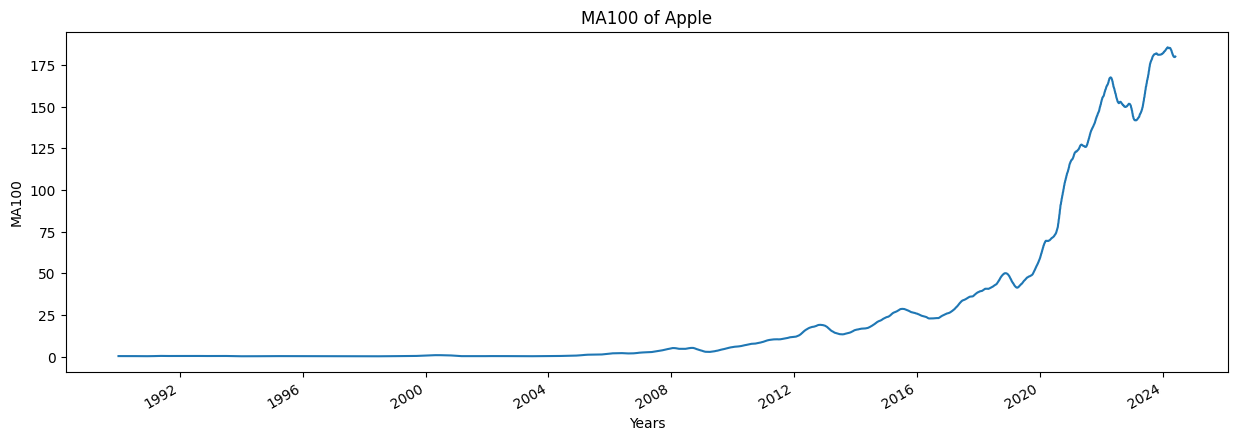

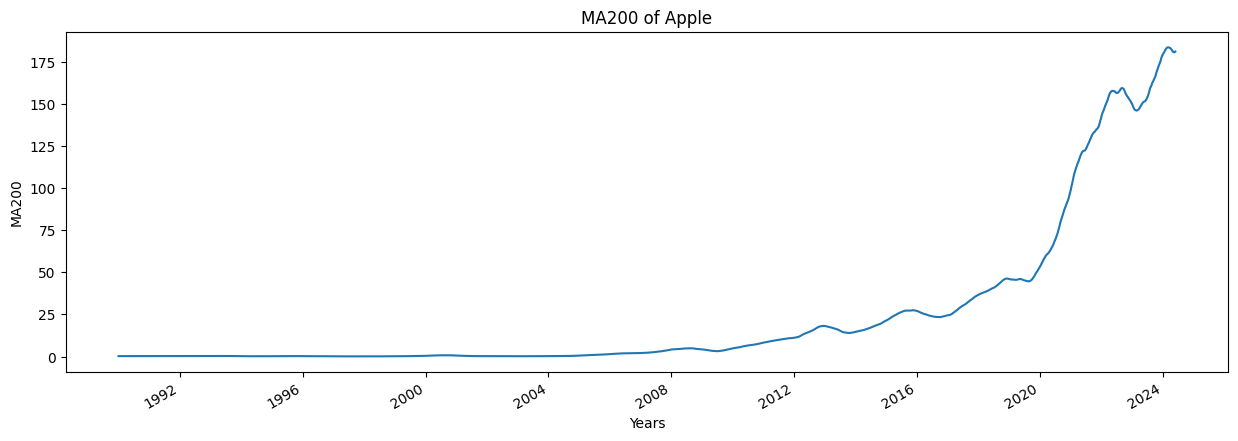

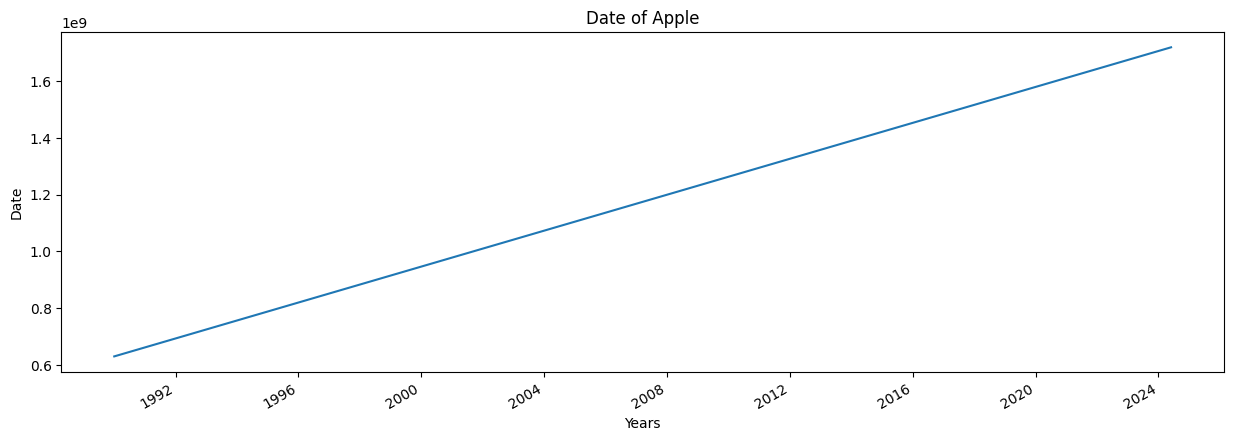

In [ ]:
for i in apple.columns:
  plot_graph(apple[i], i + ' of Apple', 'Years', i)

<Figure size 640x480 with 0 Axes>

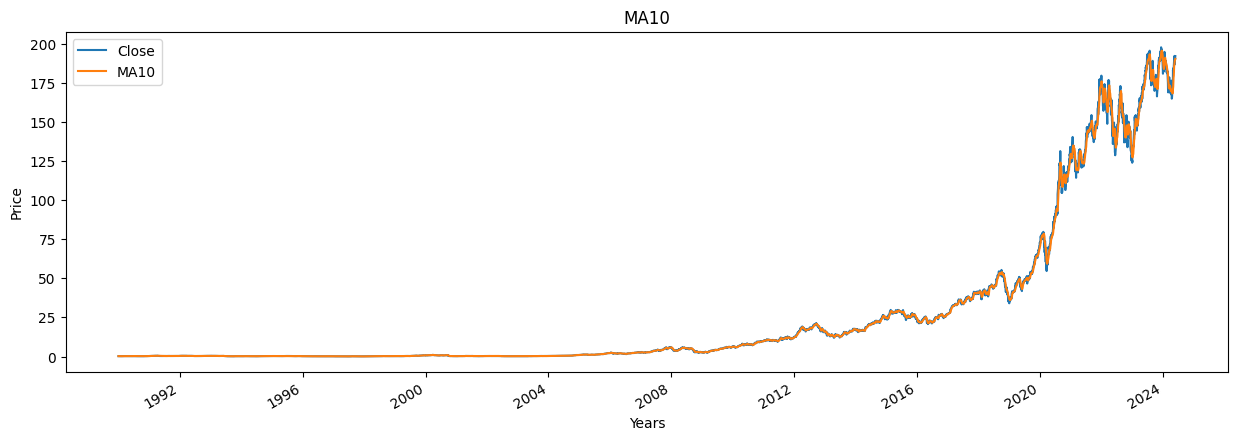

In [ ]:
plot_graph(apple[['Close', 'MA10']], 'MA10', 'Years', 'Price')

<Figure size 640x480 with 0 Axes>

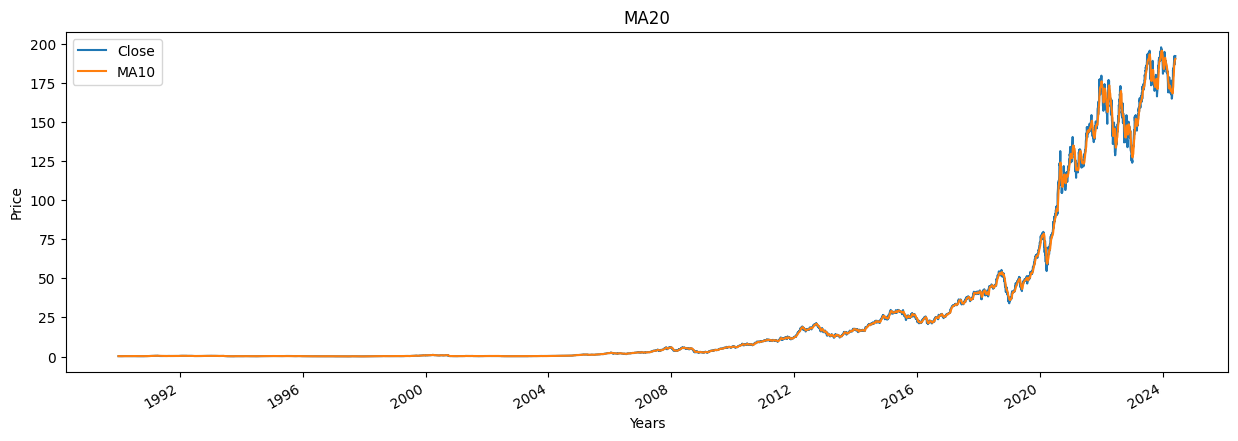

In [ ]:
plot_graph(apple[['Close', 'MA10']], 'MA20', 'Years', 'Price')

<Figure size 640x480 with 0 Axes>

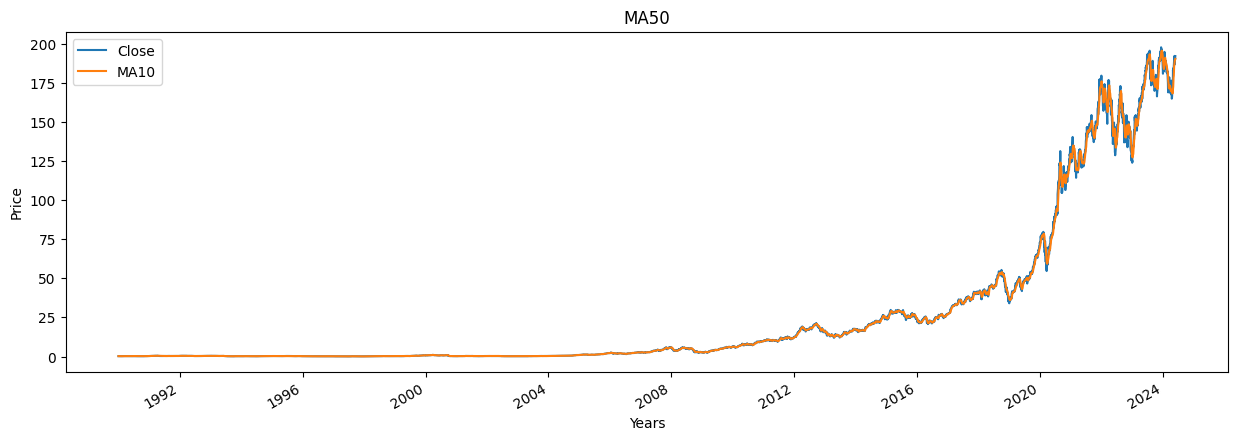

In [ ]:
plot_graph(apple[['Close', 'MA10']], 'MA50', 'Years', 'Price')

<Figure size 640x480 with 0 Axes>

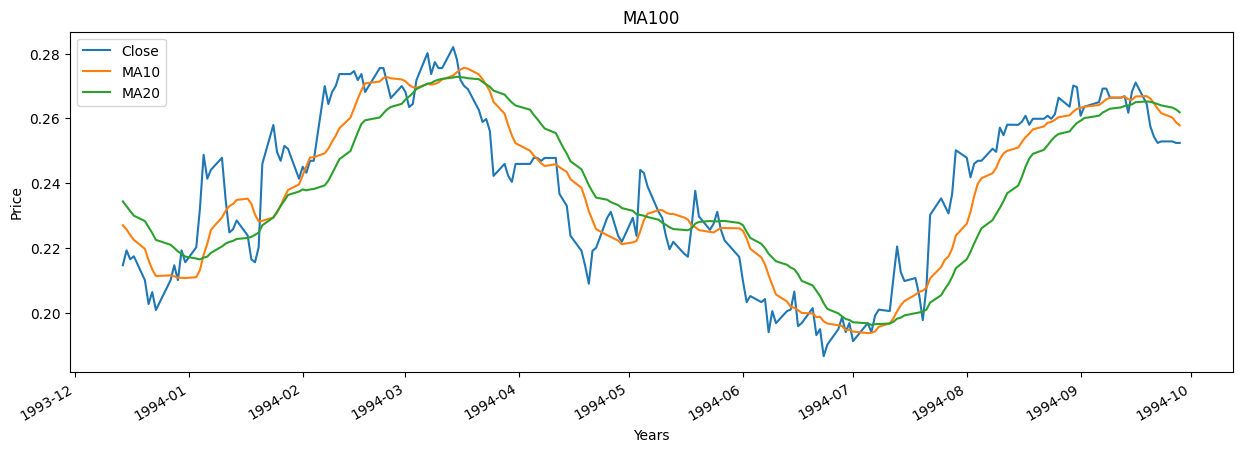

In [ ]:
plot_graph(apple[['Close', 'MA10', 'MA20']][1000:1200], 'MA100', 'Years', 'Price')

<Figure size 640x480 with 0 Axes>

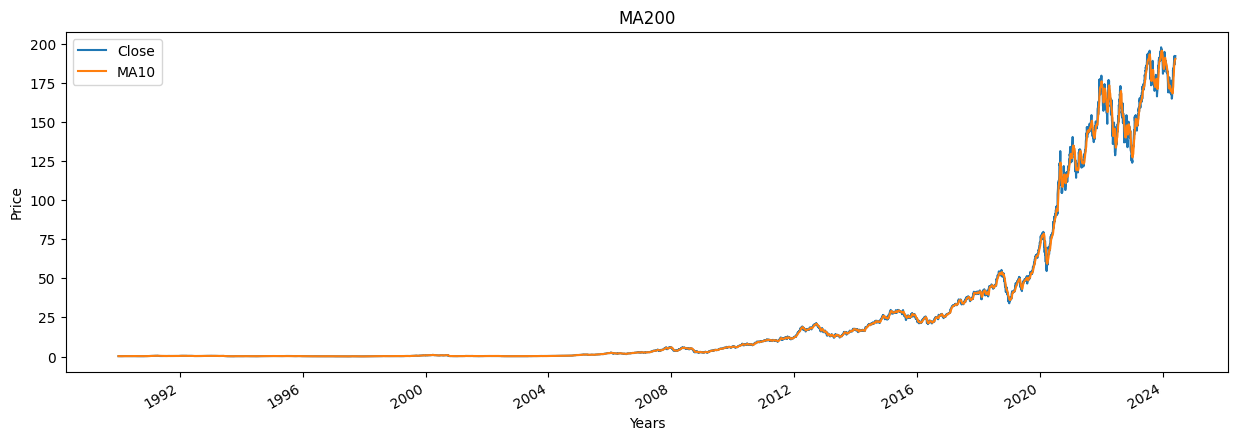

In [ ]:
plot_graph(apple[['Close', 'MA10']], 'MA200', 'Years', 'Price')

<Figure size 640x480 with 0 Axes>

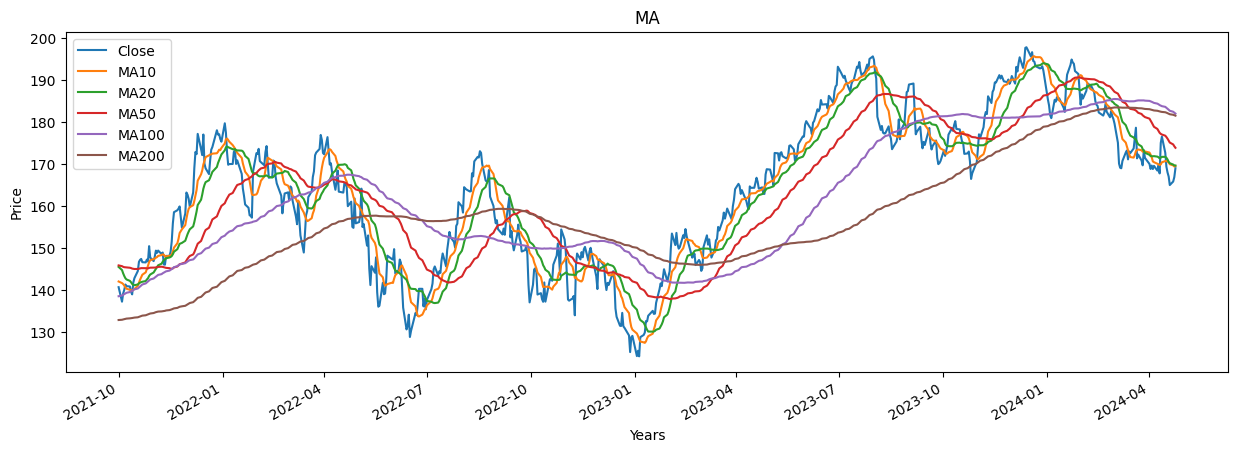

In [ ]:
plot_graph(apple[['Close', 'MA10', 'MA20', 'MA50', 'MA100', 'MA200']][8000:8644], 'MA', 'Years', 'Price')

In [ ]:
mlp = train_mlp(X_train, y_train)
linear = train_linear_regression(X_train, y_train)
rf = train_random_forest(X_train, y_train, 100)
svm = train_svm(X_train, y_train)
knn = train_knn(X_train, y_train, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-2-d3599f1e259f>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_mlp = predict(X_test, mlp)
y_pred_linear = predict(X_test, linear)
y_pred_rf = predict(X_test, rf)
y_pred_svm = predict(X_test, svm)
y_pred_knn = predict(X_test, knn)

In [ ]:
print(evaluation2(y_test, y_pred_mlp))
print(evaluation2(y_test, y_pred_linear))
print(evaluation2(y_test, y_pred_rf))
print(evaluation2(y_test, y_pred_svm))
print(evaluation2(y_test, y_pred_knn))

(0.0, 0.006, 0.998, 2.131)
(0.0, 0.002, 1.0, 0.035)
(0.0, 0.002, 1.0, 0.035)
(0.005, 0.071, 0.909, 62.597)
(0.0, 0.002, 0.999, 0.105)


In [ ]:
predict(X_newest, mlp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


array([-11391416.97434314])

In [ ]:
X_newest_mm = np.array(X_newest_mm).reshape(1, -1)

print(predict(X_newest_mm, mlp)* (y_max - y_min) + y_min)
print(predict(X_newest_mm, linear) * (y_max - y_min) + y_min)
print(predict(X_newest_mm, rf) * (y_max - y_min) + y_min)
print(predict(X_newest_mm, svm) * (y_max - y_min) + y_min)
print(predict(X_newest_mm, knn) * (y_max - y_min) + y_min)

[205.47769024]
[[211.69859353]]
[210.84750428]
[192.46115708]
[[208.62565749]]


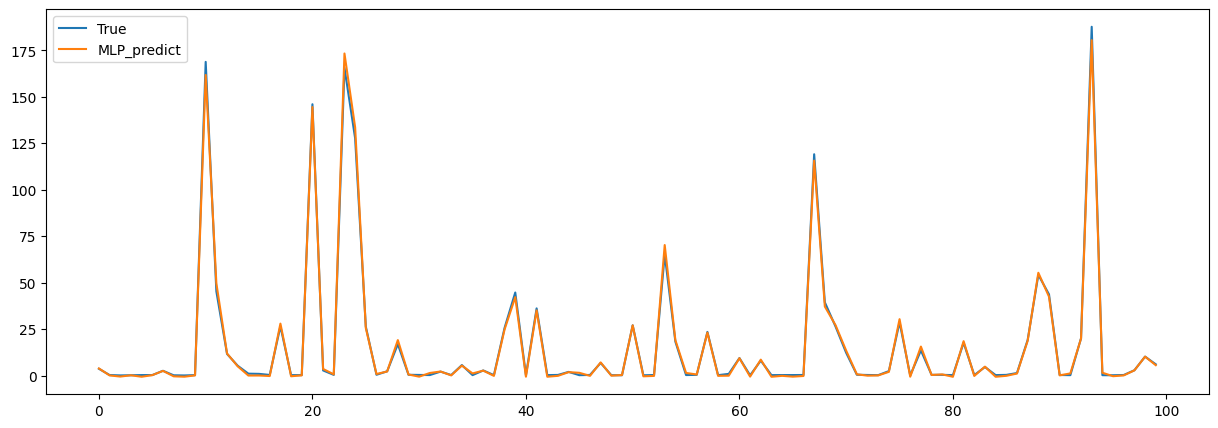

In [ ]:
s = np.random.randint(y_test.shape[0]-100)
e = s + 100

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test[s:e] * (y_max - y_min) + y_min), label='True')
plt.plot(y_pred_mlp[s:e] * (y_max - y_min) + y_min, label='MLP_predict')
plt.legend()
plt.show()

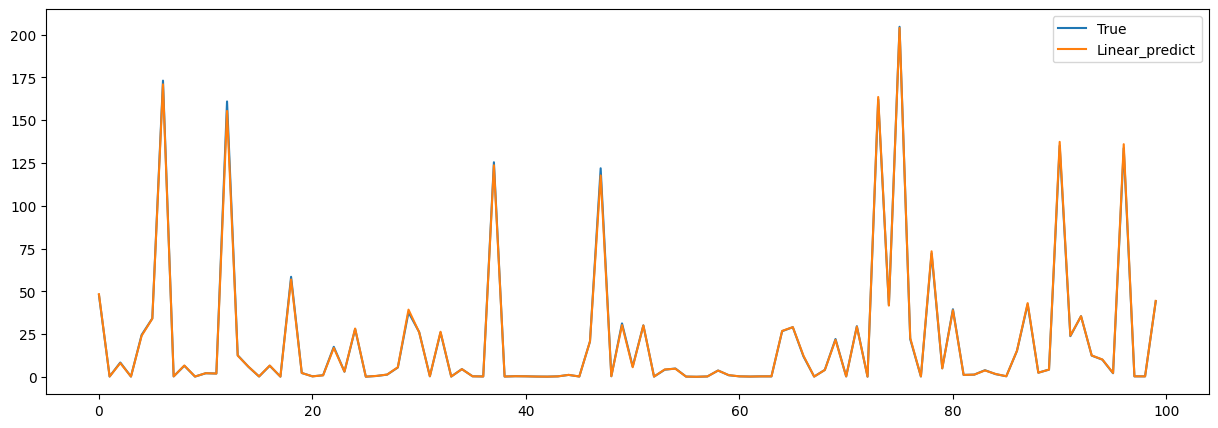

In [ ]:
s = np.random.randint(y_test.shape[0]-100)
e = s + 100

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test)[s:e] * (y_max - y_min) + y_min, label='True')
plt.plot(y_pred_linear[s:e] * (y_max - y_min) + y_min, label='Linear_predict')
plt.legend()
plt.show()

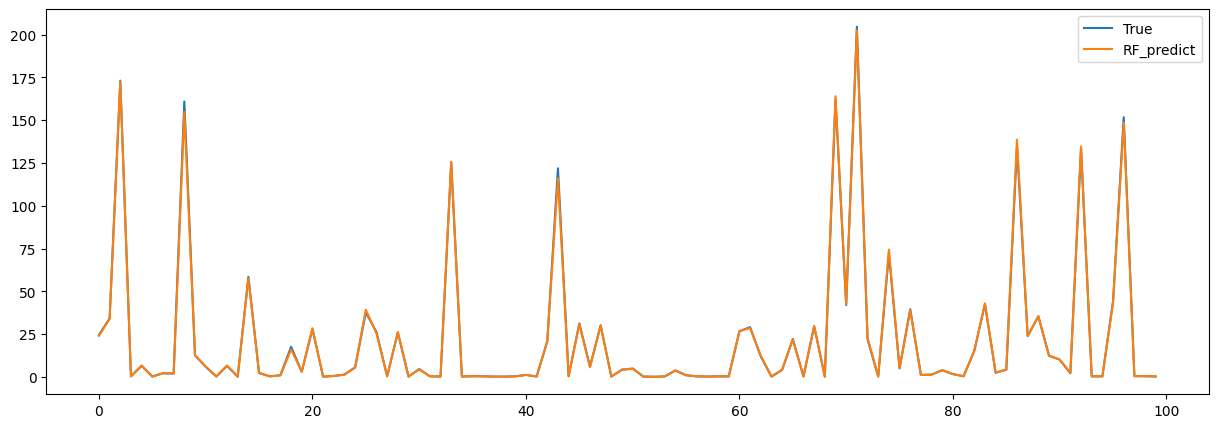

In [ ]:
s = np.random.randint(y_test.shape[0]-100)
e = s + 100

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test)[s:e] * (y_max - y_min) + y_min, label='True')
plt.plot(y_pred_rf[s:e] * (y_max - y_min) + y_min, label='RF_predict')
plt.legend()
plt.show()

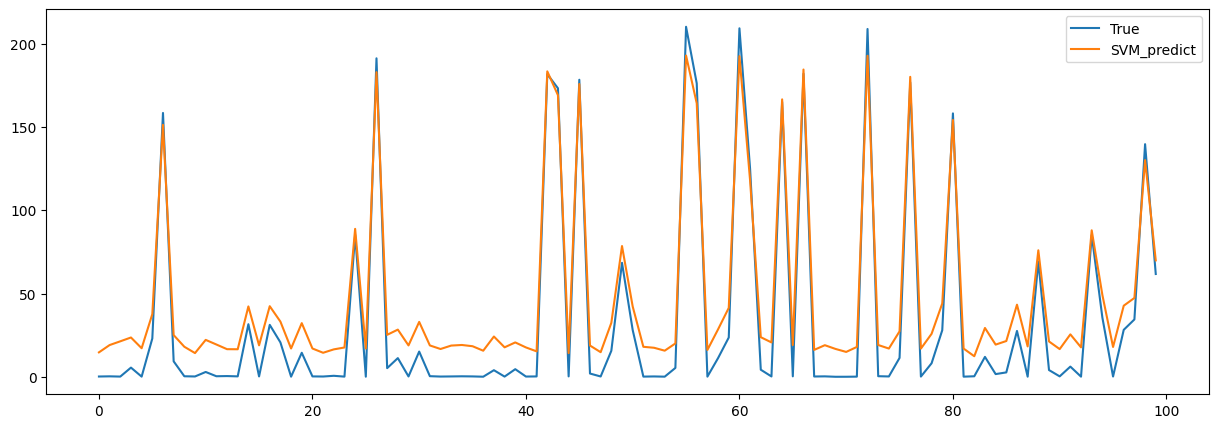

In [ ]:
s = np.random.randint(y_test.shape[0]-100)
e = s + 100

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test)[s:e] * (y_max - y_min) + y_min, label='True')
plt.plot(y_pred_svm[s:e] * (y_max - y_min) + y_min, label='SVM_predict')
plt.legend()
plt.show()

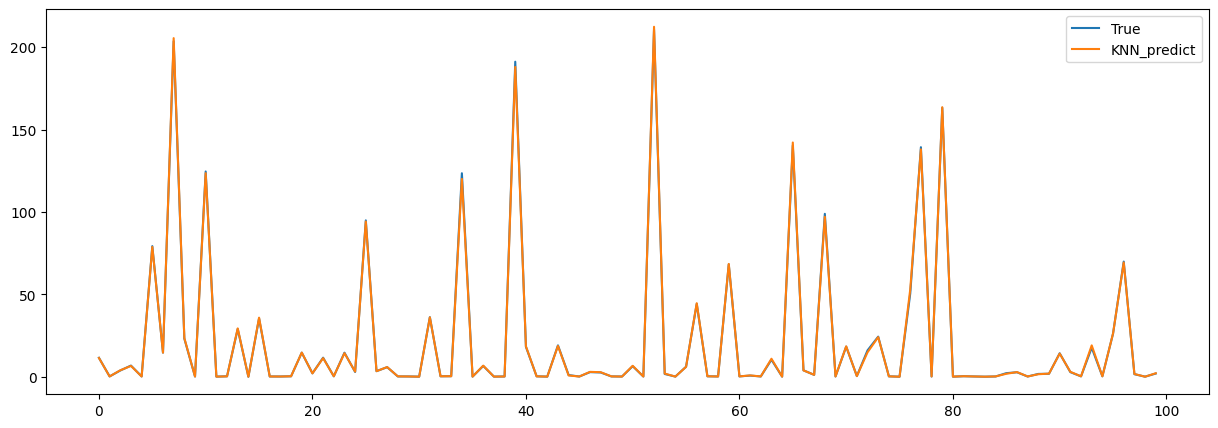

In [ ]:
s = np.random.randint(y_test.shape[0]-100)
e = s + 100

plt.figure(figsize=(15,5))
plt.plot(np.array(y_test)[s:e] * (y_max - y_min) + y_min, label='True')
plt.plot(y_pred_knn[s:e] * (y_max - y_min) + y_min, label='KNN_predict')
plt.legend()
plt.show()